In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import  NearMiss
from collections import  Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import  tree
from sklearn.model_selection import  cross_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.isnull().sum().max()

0

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.isnull().count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
x = data.drop('Class',axis=1)
y = data.Class

In [ ]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
fraud = data[data["Class"]==1]
Normal = data[data["Class"]==0]

In [ ]:
print(fraud.shape,Normal.shape)

(492, 31) (284315, 31)


Text(0, 0.5, 'Freaquency')

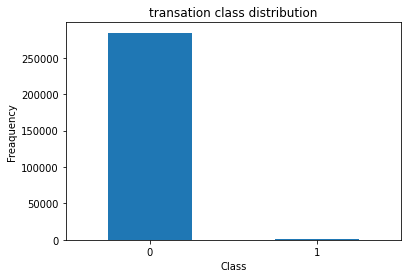

In [ ]:
count_class = pd.value_counts(data["Class"],sort=True)
count_class.plot(kind='bar',rot =0)
plt.title("transation class distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Freaquency")

In [ ]:
print("No Fraud",round(data['Class'].value_counts()[0]/len(data) * 100,2),'% of the dataset')

No Fraud 99.83 % of the dataset


In [ ]:
print("Fraud",round(data['Class'].value_counts()[1]/len(data) * 100,2),'% of the dataset')

Fraud 0.17 % of the dataset


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution')

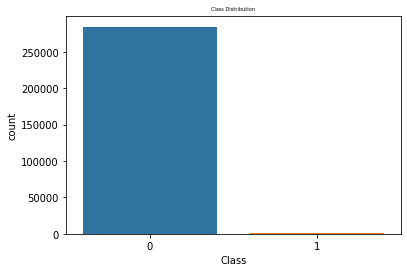

In [ ]:
sns.countplot("Class", data=data)
plt.title("Class Distribution",fontsize = 5)

### UNDER SAMPLING###

In [ ]:
NM = NearMiss(random_state=20)
x_res,y_res = NM.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Orginal data {}".format(Counter(y)))
print("under sampled data{}".format(Counter(y_res)))

Orginal data Counter({0: 284315, 1: 492})
under sampled dataCounter({0: 492, 1: 492})


### OVER SAMPLING ###   ( SMOTETomek and RandomOverSampler)

In [ ]:
smk = SMOTETomek(random_state=20)
X_res,Y_res = smk.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_res.shape,Y_res.shape

((567572, 30), (567572,))

In [ ]:
print("Orginal data {}".format(Counter(y)))
print("Smotetomek data {}".format(Counter(y_res)))

Orginal data Counter({0: 284315, 1: 492})
Smotetomek data Counter({0: 492, 1: 492})


In [ ]:
ros = RandomOverSampler(ratio=1)
x_resR,y_resR  = ros.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_resR.shape,y_resR.shape

((568630, 30), (568630,))

In [ ]:
print("Orginal data {}".format(Counter(y)))
print("RandomOverSampler data {}".format(Counter(y_resR)))

Orginal data Counter({0: 284315, 1: 492})
RandomOverSampler data Counter({0: 284315, 1: 284315})


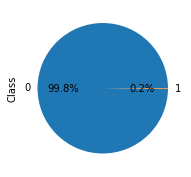

In [ ]:
data.Class.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(3,3))

In [ ]:
x1 = x_resR
y1 = y_resR

In [ ]:
x1

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 7.71820000e+04, -1.41085190e+00,  2.26827061e+00, ...,
         3.73595916e-01,  1.87657249e-01,  1.00000000e+00],
       [ 9.71210000e+04, -1.79762661e+01,  1.28649886e+01, ...,
        -3.25598091e+00, -5.38963227e-01,  8.64000000e+00],
       [ 1.25200000e+05, -7.69171692e-01,  1.34221226e+00, ...,
         2.50530561e-01,  2.50987223e-01,  4.00000000e+01]])

In [ ]:
y1

array([0, 0, 0, ..., 1, 1, 1])

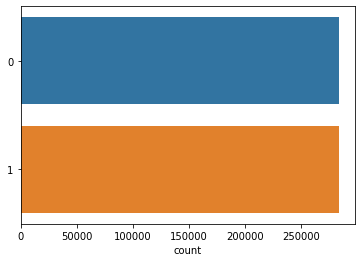

In [ ]:
sns.countplot(y=y_resR,data=data)

In [ ]:
print("Orginal data {}".format(Counter(y_resR)))
# print("RandomOverSampler data {}".format(Counter(y_resR)))

Orginal data Counter({0: 284315, 1: 284315})


### CORRELATION###

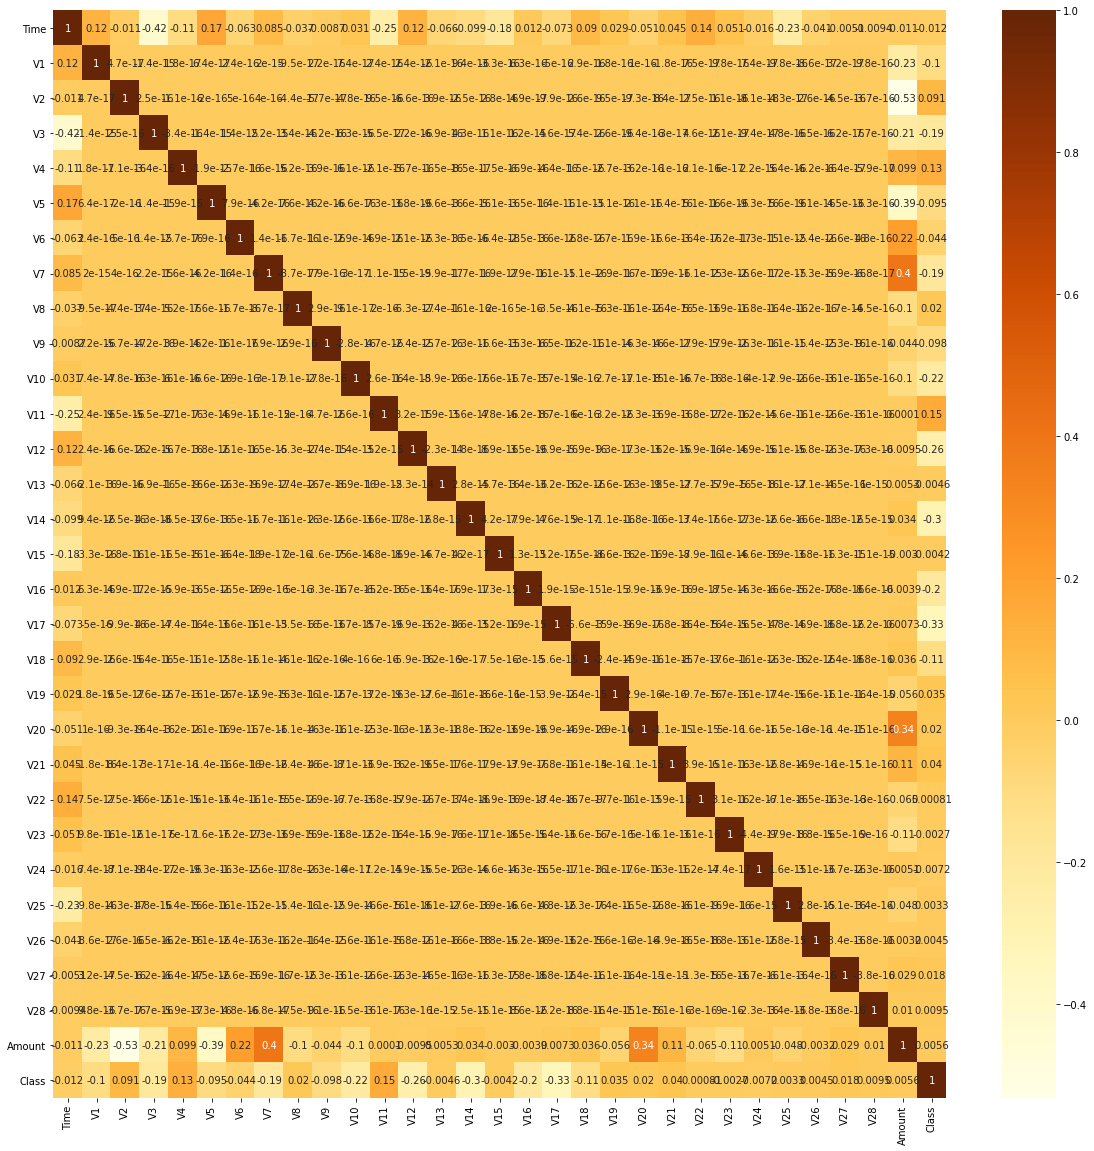

In [ ]:
cor = data.corr()
top_cor_features = cor.index
plt.figure(figsize = (20,20))
sns.heatmap(data[top_cor_features].corr(),annot=True,cmap="YlOrBr")
# sns.heatmap(top_cor_features.corr().annot =True,cmap="RdYIGn")v


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state =42)
print("x_train sahape : ", x_train.shape)
print("x_test sahape : ", x_test.shape)
print("y_train sahape : ", y_train.shape)
print("y_test sahape : ", y_train.shape)





x_train sahape :  (213605, 30)
x_test sahape :  (71202, 30)
y_train sahape :  (213605,)
y_test sahape :  (213605,)


In [ ]:
std = StandardScaler()
std.fit(x_train)
x_train = std.transform(x_train)
x_test = std.transform(x_test)

In [ ]:
x_train[0]

array([-0.73827037, -0.83952517,  0.73847641,  0.90393337, -1.22505   ,
       -0.02238498, -0.3608586 ,  0.73314941, -0.36632786,  0.8943078 ,
        1.14267112,  1.08119938,  0.05909232, -0.66353961, -0.5575187 ,
        0.05157159,  0.75711374, -1.50852619,  0.21962328, -0.40676805,
        0.49265315, -0.29668017, -0.27840435, -0.33697022,  0.01967759,
       -0.58051322,  1.31006662, -0.64982719, -0.30113087, -0.19601641])

In [ ]:
dt =  DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
dt.score(x_test,y_test)

0.9990871042948232

In [ ]:
dt.score(x_train,y_train)

1.0

In [ ]:
dt.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
dt.predict_proba(x_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### CROSS VALIDATION###

In [ ]:
cross_val_score(dt,x,y,cv=10)

array([0.02264668, 0.99870089, 0.99908711, 0.99919244, 0.99926267,
       0.99638355, 0.998736  , 0.99866573, 0.9991573 , 0.99894663])

In [ ]:
cross_val_score(dt,x,y,cv=10).mean()

0.9010779002481055

In [ ]:
y_pred = dt.predict_proba(x_test)[:,1]
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
new_y = []
for i in range(len(y_pred)):
  if y_pred [i] < 0.4:
    new_y.append(0)
  else:
    new_y.append(1)


In [ ]:
new_y

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
accuracy_score(y_test,new_y)

0.9990871042948232

In [ ]:
train_accuracy_score = []
test_accuracy = []
for depth in range(1,10):
  dt_model  =  DecisionTreeClassifier(max_depth=depth,random_state= 42)
  dt_model.fit(x_train,y_train)
  train_accuracy_score.append(dt_model.score(x_train,y_train))
  test_accuracy.append(dt_model.score(x_test,y_test))


In [ ]:
frame  = pd.DataFrame({'max_depth': range(1,10),"train_accuracy":train_accuracy_score,"test_accuracy": test_accuracy})
frame

,max_depth,train_accuracy,test_accuracy
0,1,0.999111,0.999031
1,2,0.999307,0.999185
2,3,0.999368,0.999298
3,4,0.999448,0.999396
4,5,0.999579,0.999480
5,6,0.999616,0.999466
6,7,0.999668,0.999452
7,8,0.999705,0.999438
8,9,0.999733,0.999466


No handles with labels found to put in legend.


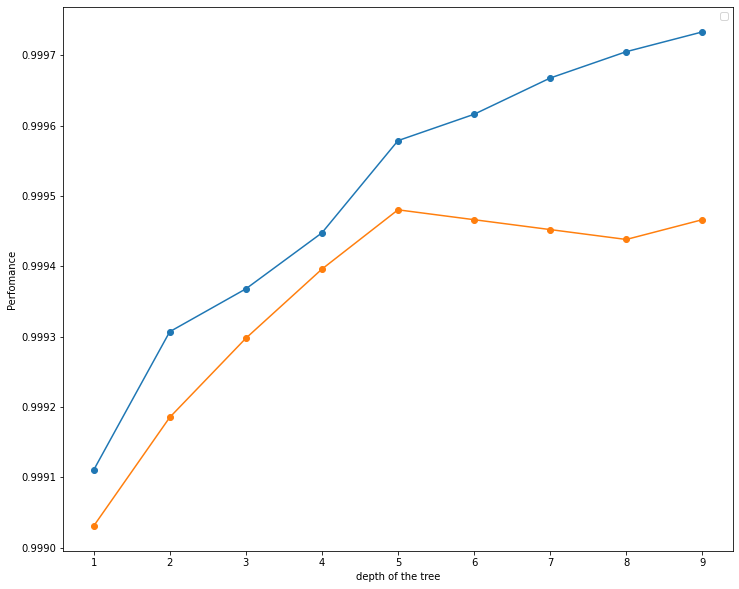

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(frame['max_depth'],frame["train_accuracy"],marker = "o")
plt.plot(frame['max_depth'],frame['test_accuracy'],marker = "o")
plt.xlabel("depth of the tree")
plt.ylabel("Perfomance")
plt.legend()


In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=20,random_state=25)
dt_model.fit(x_train,y_train)
dt_model.score(x_train,y_train)
dt_model.score(x_test,y_test)


0.9994663071262043

In [ ]:
!pip install graphviz

In [ ]:
decision_tree  = tree.export_graphviz(dt_model, out_file='tree.dot',feature_names = x_train[10],max_depth=3,filled=True)
!dot -Tpng tree.dot -o tree.png

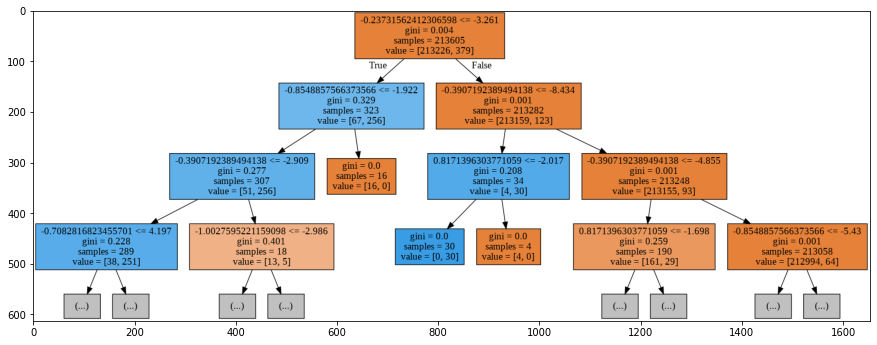

In [ ]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)